# Анализ данных сервиса аренды самокатов GoFast

Анализ данных сервиса аренды самокатов GoFast.

**Задача:**

1. Провести предообработку данных.
2. Провести исследовательский анализ данных.
3. Провести анализ дальности и продолжительности поездки для пользователей с подпиской и без подписки
4. Произвести расчет помесмячной выручки.
5. Проверить гипотезы:
- пользователи с подпиской тратят больше времени на поездки;
- среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров;
- помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

6. Проверить задачи, поставленные отделом маркетинга:
- Нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10% пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%.;
- Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

<a id=0></a>

**Основные выводы:**

Командой сервиса была поставлена задача проверить 3 гипотезы:

Гипотеза 1 подтвердилась. Средняя продолжительность поездки пользователей с подпиской выше, чем пользователей без подписки. 

Гипотеза 2 не подтвердилась. По данным имеющейся выборки нельзя утверждать, что средняя дальность поездки для пользователей с подпиской не превышает 3130 м.

Гипотеза 3 подтвердилась. Средняя помесячная выручка от одного пользователя с подпиской выше, чем выручка от пользователя без подписки.

Задачи отдела маркетинга. Командой сервиса были поставлены 2 задачи:

- На основании данных о ранее проведенной акции с раздачей промокодов найти минимальное количество промокодов, которые надо разослать клиентам, чтобы с вероятностью 95% минимум 100 клиентов продлили подписку после окончания бесплатного периода;
- Оценить вероятность того, что при рассылке 1 млн. уведомлений в приложении эти уведомления откроют менее 399,5 тыс. пользователей.

Задача 1: примерное количество необходимых промокодов - 1160 шт. 

Задача 2: вероятность того, что push-уведомление откроют менее 399,5К пользователей 15,37%.

ПЛАН:

1. [Загрузка и описание данных](#1)
    * [Просмотр данных](#1.1)
    * [Промежуточный вывод](#1.2)
2. [Предобработка данных](#2)
    * [Поиск явных дубликатов](#2.1)
    * [Поиск неявных дубликатов](#2.2)
    * [Замена типа данных](#2.3)
    * [Добавление столбца с информацией о месяце](#2.4)
    * [Промежуточный вывод](#2.5)
3. [Исследовательский анализ данных](#3)
    * [Частота встречаемости городов](#3.1)
    * [Соотношение пользователей с подпиской и без подписки](#3.2)
    * [Возраст пользователей](#3.3)
    * [Расстояние поездки](#3.4)
    * [Продолжительность поездки](#3.5)
    * [Промежуточный вывод](#3.6)
4. [Объединение данных](#4)
    * [Объединение датафреймов](#4.1)
    * [Разделение датасета по признаку наличия подпсики](#4.2)
    * [Анализ продолжительности и расстояния поездок](#4.3)
    * [Промежуточный вывод](#4.4)
5. [Подсчет выручки](#5)
    * [Датасет с агрегированными данными](#5.1)
    * [Расчет выручки](#5.2)
    * [Промежуточный вывод](#5.3)
6. [Проверка гипотез](#6)
    * [Гипотеза 1](#6.1)
    * [Гипотеза 2](#6.2)
    * [Гипотеза 3](#6.3)
    * [Гипотеза 4](#6.4)
    * [Промежуточный вывод](#6.5)
7. [Распределения](#7)
    * [Задача 1](#7.1)
    * [Задача 2](#7.2)
8. [Вывод](#8)

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import binom, norm
from math import sqrt, factorial

<a id=1></a>
## Загрузка и описание данных

In [2]:
# импортируем данные

users = pd.read_csv('users_go.csv')
rides = pd.read_csv('rides_go.csv')
prices = pd.read_csv('subscriptions_go.csv')

<a id=1.1></a>
### Просмотр данных

In [3]:
# просмотрим представление данных в датасете users

users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [4]:
# просмотрим таблицу users на предмет наличия пропусков и типов данных в колонках

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Типы данных корректные. Пропусков нету. Оценим описательные статистики столбца age таблицы users

In [5]:
users.age.describe()

count    1565.000000
mean       24.922045
std         4.553496
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

В таблице users 1565 строк, пропусков нету. Типы данных корректные. Минимальный возраст райдера - 12 лет, максимальный - 43 года. Среднее значение близко к медианному. Стандартное отлонение небольшое. На первый взгляд данные выглядят нормально. Взглянем на таблицу rides

In [6]:
rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [7]:
# просмотрим таблицу rides на предмет наличия пропусков и типов данных в колонках

rides.info(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Во всех столбцах кроме date типы данных корректные. Пропусков нету. Оценим описательные статистики столбцов distance и duration таблицы rides

In [8]:
rides[['distance', 'duration']].describe()

,distance,duration
count,18068.000000,18068.000000
mean,3070.659976,17.805011
std,1116.831209,6.091051
min,0.855683,0.500000
25%,2543.226360,13.597563
50%,3133.609994,17.678395
75%,3776.222735,21.724800
max,7211.007745,40.823963


Таблица rides содержит 18068 строк. Пропусков нету. В столбце date неверный тип данных (object) необходимо заменить на datetime. Средние значения в столбцах distance и duration близки к медианам, значит больших выбросов нету. Максимальная дальность поездки 7211 метров выглядит маленькой, минимальная дальность - 0,8 метра. Необходимо обратить внимание на количество таких малых значений. Минимальная длительность поездки - 0,5 минуты. Максимальная длительность - 40 минут. Данное значение, как и максимальная дальность поездки, достаточно маленькие, возможно в данных есть ошибки.

В связи с тем, что таблица rides содержит намного больше строк сравним количество значений в столбце user_id таблиц

In [9]:
# для вывода количества уникальных user_id используем метод nunique()

rides.user_id.nunique()

1534

Количество пользователей в таблицах не сходится. Примем это к сведению при объединении таблиц. Теперь взглянем на последнюю таблицу.

In [10]:
prices.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<a id=1.2></a>
### Промежуточный вывод

1. В таблице users 1565 строк, пропусков нету. Типы данных корректные. Среднее значение близко к медианному. Стандартное отлонение небольшое. 
2. Таблица rides содержит 18068 строк. Пропусков нету. В столбце date необходимо изменить тип данных. Средние значения в столбцах distance и duration близки к медианам, стандартные отклонения небольшие. Необходимо обратить внимание на небольшую максимальную дальность поездки (7211 метров) и небольшую максимальную длительность поездки (40 минут).
3. Таблица  rides содержит большее количество user_id, это необходимо принять во внимание при объединении таблиц.

[В начало](#0)

<a id=2></a>
## Предобработка данных

<a id=2.1></a>
### Поиск явных дубликатов

In [11]:
# поиск явных дубликатов в таблицах при помощи методов duplicated() и sum()

users.duplicated().sum()

31

In [12]:
rides.duplicated().sum()

0

На данном этапе обнаружено 31 повторяющееся значение в таблице users. Взглянем на эти строки.

In [13]:
users[users.duplicated(keep=False)].sort_values(by = 'name').head(50)

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
292,293,Агата,26,Краснодар,ultra
1545,807,Александр,28,Екатеринбург,free
806,807,Александр,28,Екатеринбург,free
1553,121,Алина,25,Пятигорск,ultra
120,121,Алина,25,Пятигорск,ultra
15,16,Амалия,27,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1559,209,Андрей,23,Омск,ultra
208,209,Андрей,23,Омск,ultra


Ошибок нету, удаляем дубликаты в таблице users

In [14]:
# удаляем дубликаты при помощи метода drop_duplicates()
# после сбросим индексы таблицы

users = users.drop_duplicates().reset_index()

In [15]:
# контроль обработки

users.duplicated().sum()

0

Дополнительно проверим наличие дубликатов в таблицах по совокупности нескольких основных столбцов.

In [16]:
# для таблицы users проверим наличие дубликатов в столбцах user_id и name

users.duplicated(['user_id', 'name']).sum()

0

In [17]:
# для таблицы rides проверим наличие дубликатов в столбцах distance и duration

rides.duplicated(['distance', 'duration']).sum()

0

Сверим количество уникальных ID в таблицах

In [18]:
users.user_id.nunique()

1534

In [19]:
rides.user_id.nunique()

1534

Количество ID в таблицах сходится

<a id=2.2></a>
### Поиск неявных дубликатов

Проверим наличие неявных дубликатов в столбце city таблицы users 

In [20]:
# при помощи метода value_counts() выведем количество записей по каждому городу в столбце city

users.city.value_counts()

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

Названия городов корректны, дубликатов нету.

<a id=2.3></a>
### Замена типа данных в столбце data на datetime

In [21]:
# замена типа данных в столбце при помощи метода to_datetime

rides.date = pd.to_datetime(rides.date, format = '%Y-%m-%d')

In [22]:
# контроль обработки

rides.info()
display(rides.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<a id=2.4></a>
### Добавление столбца с информацией о месяцах из столбца data

Что бы в дальнейшем не допустить появления ошибок при группировке по месяцам проверим за какой период представлены данные в датасете

In [23]:
rides.sort_values(by='date')

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
13113,1184,5322.175064,25.206214,2021-01-01
5445,582,2842.009269,22.180040,2021-01-01
12775,1159,3098.412934,18.300367,2021-01-01
17096,1467,1875.822964,16.039241,2021-01-01
...,...,...,...,...
15325,1340,3857.681536,23.615347,2021-12-30
7541,774,3008.533004,9.446856,2021-12-30
6115,655,3803.882324,21.679608,2021-12-30
10991,1027,5080.095582,15.700239,2021-12-30


В выборке представлены записи за период с 01.01.2021 по 30.12.2021. Добавим в таблицу столбец с номером месяца

In [24]:
# на основе столбца date добавляем в таблицу rides столбец month с информацией и месяце поездки

rides['month'] = rides['date'].dt.month

In [25]:
# контроль обработки

rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


<a id=2.5></a>
### Промежуточный вывод

1. В таблице users обнаружено 31 дублированное значение. Дубликаты были удалены.
2. Неявные дубликаты в названиях населенных пунктов не обнаружены.
3. В столбце date таблицы rides тип данных был изменен с object на datetime64.
4. В таблицу rides добавлен столбце с информацией о месяце поездки на основании столбца  date.

[В начало](#0)

<a id=3></a>
## Исследовательский анализ данных

Построим следующие визуализации и изучим основные параметры таблиц:

1. Частота встречаемости городов.
2. Соотношение пользователей с подпиской и без подписки.
3. Возраст пользователей.
4. Расстояние поездки.
5. Продолжительность поездки.

<a id=3.1></a>
### Частота встречаемости городов

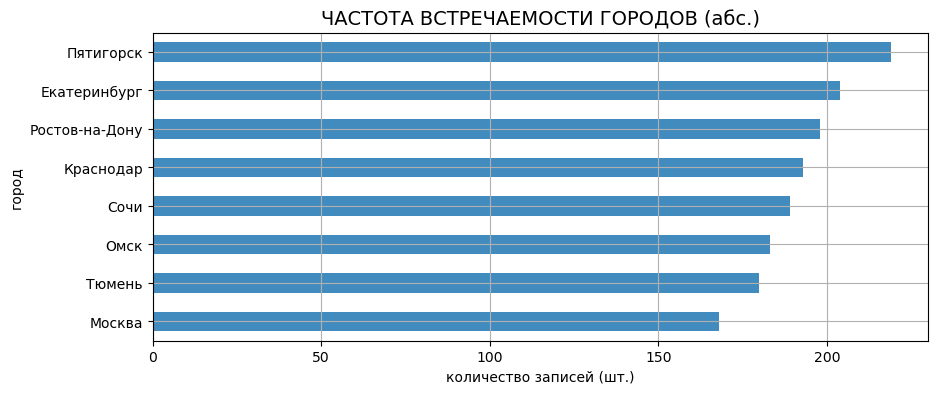

In [26]:
# при помощи метода value_counts() подсчитаем и отсортируем данные по городу
# для визуализации абсолютного количества используем горизонтальную столбчатую диаграмму

(
    users
    .city
    .value_counts(ascending=True)
    .plot(
        kind='barh',
        figsize=(10,4),
        grid=True,
        alpha=0.85,
        legend=False
    )
)
plt.title('ЧАСТОТА ВСТРЕЧАЕМОСТИ ГОРОДОВ (абс.)', fontsize = 14, color = 'black')
plt.xlabel('количество записей (шт.)', fontsize = 10, color = 'black')
plt.ylabel('город', fontsize = 10, color = 'black')
plt.show()

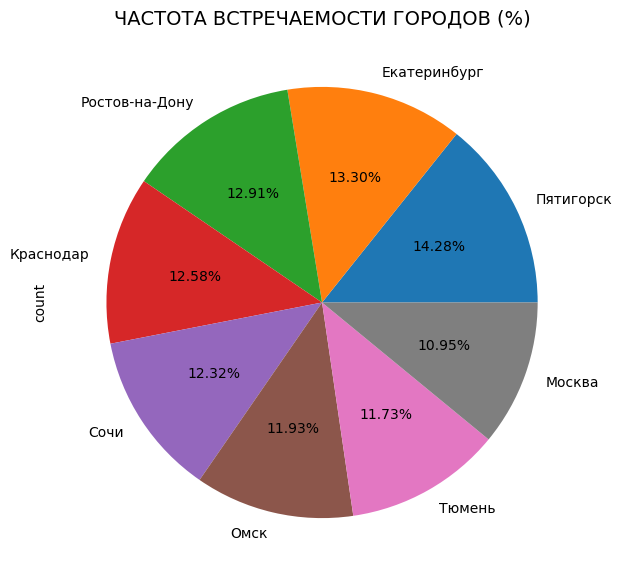

In [27]:
# для визуализации относительного количества используем круговую диаграмму

(
    users
    .city
    .value_counts()
    .plot(
        kind='pie',
        figsize=(7,7),
        grid=True,
        legend=False,
        autopct='%1.2f%%'
    )
)
plt.title('ЧАСТОТА ВСТРЕЧАЕМОСТИ ГОРОДОВ (%)', fontsize = 14, color = 'black')
plt.show()

По количеству клиентов (в выданной выборке) первое место с 14.3% поездок занимает Пятигорск. Москва с 11% поездок занимает 8 место. Стоит отметить плотное распределение пользователей по городам: между первым и последним местом 3.33 процентных пункта.

Посмотрим на частоту встречаемости городов среди клиентов с платной подпиской.

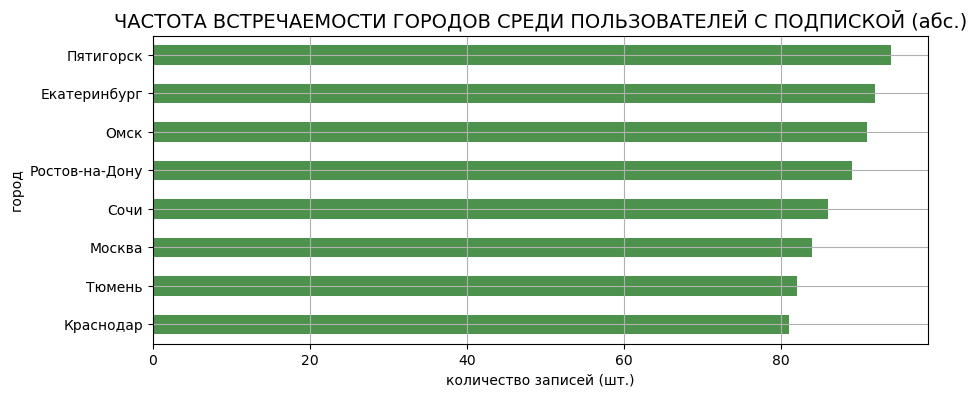

In [28]:
(
    users[users['subscription_type'] == 'ultra']
    .city
    .value_counts(ascending=True)
    .plot(
        kind = 'barh',
        figsize = (10,4),
        grid = True,
        color='darkgreen',
        alpha = 0.7,
        legend = False
    )
)
plt.title('ЧАСТОТА ВСТРЕЧАЕМОСТИ ГОРОДОВ СРЕДИ ПОЛЬЗОВАТЕЛЕЙ С ПОДПИСКОЙ (абс.)', fontsize = 14, color = 'black')
plt.xlabel('количество записей (шт.)', fontsize = 10, color = 'black')
plt.ylabel('город', fontsize = 10, color = 'black')
plt.show()

По количеству клиентов с подпиской первое место занимает Пятигорск. Омск и Москва поднялись с 6 на 3 и с 8 на 6 места соответственно. Меньше всего клиентов с подпиской в Краснодаре (по общему количеству клиентов Краснодар на 4 месте).

<a id=3.2></a>
### Соотношение пользователей с подпиской и без подписки

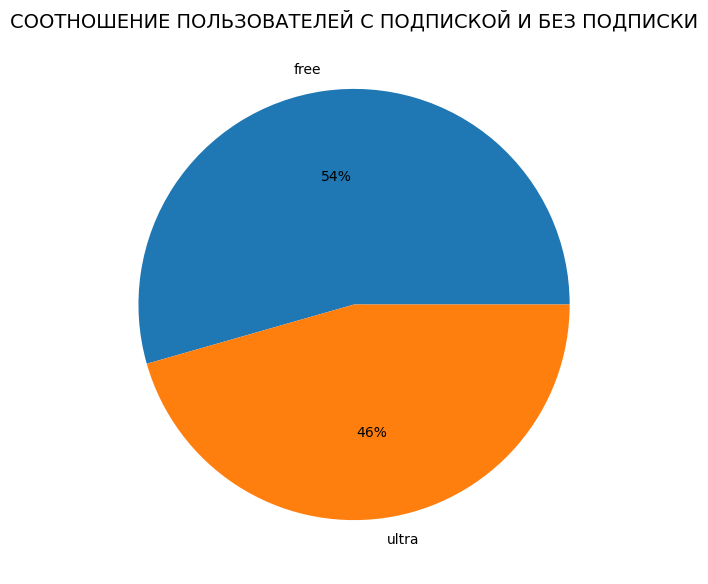

In [29]:
# при помощи метода value_counts() подсчитаем количество пользователей с и без подписки
# для визуализации используем круговую диаграмму

(
    users
    .subscription_type
    .value_counts()
    .plot(
     kind='pie',
        figsize=(7,7),
        autopct='%1.0f%%'
    )
)
plt.title('СООТНОШЕНИЕ ПОЛЬЗОВАТЕЛЕЙ С ПОДПИСКОЙ И БЕЗ ПОДПИСКИ', fontsize = 14, color = 'black')
plt.xlabel('')
plt.ylabel('')
plt.show()

Соотношение пользователей с подпиской и без практически равное. Пользователей без подписки больше на 8 п.п. 

Посмотрим на соотношение клиентов с подпиской по городам.

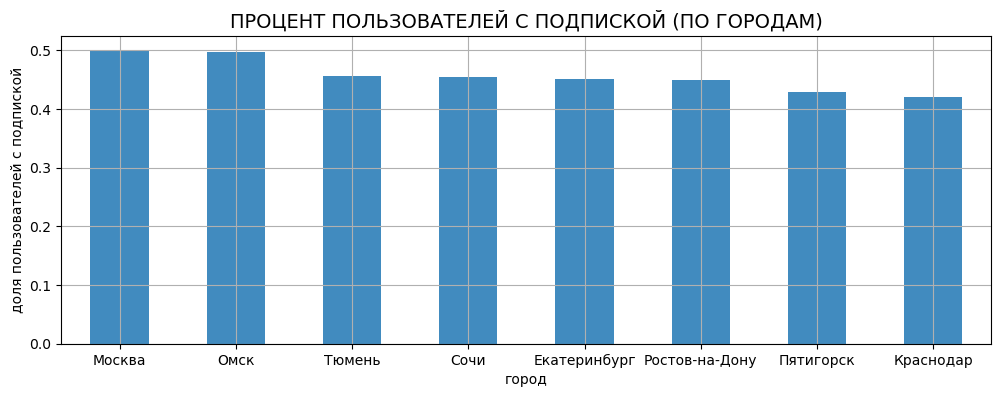

In [30]:
# для удобства обработки данных по наличию подписки необходимо добавить столбец, показывающий наличие подписки у пользователя
# для этого создадим копию исходного датасета


users_copy = users[['age', 'city', 'subscription_type']].copy()

# при помощи метода np.where() создадим столбец с флагом наличия у пользователя подписки

users_copy['subscription_flg'] = np.where(users_copy['subscription_type'] == 'ultra', 1, 0)

# построим сводную таблицу с информацией о доле клиентов с подписками по городам, отсортируем таблицу по убыванию
# для визуализации используем столбчатую диаграмму

users_city_subs = (
    users_copy.pivot_table(index='city', values='subscription_flg')
    .round(3)
    .sort_values(by='subscription_flg', ascending=False)
    .plot(
        kind='bar',
        figsize=(12,4),
        grid=True,
        alpha=0.85,
        legend=False
    )
)
plt.title('ПРОЦЕНТ ПОЛЬЗОВАТЕЛЕЙ С ПОДПИСКОЙ (ПО ГОРОДАМ)', fontsize = 14, color = 'black')
plt.xlabel('город', fontsize = 10, color = 'black')
plt.ylabel('доля пользователей с подпиской', fontsize = 10, color = 'black')
plt.xticks(rotation=0)
plt.show()

Самая большая доля клиентов с подпиской в Москве и Омске - 50%, меньше всего в Краснодаре - 42%. Эти данные подтверждаются диаграммой частоты встречаемости городов среди пользователей с подпиской из п. 3.1

<a id=3.3></a>
### Возраст пользователей

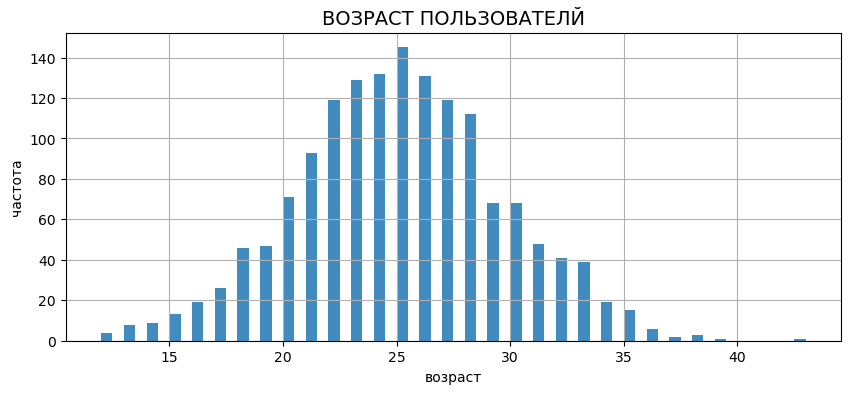

In [31]:
# на основе данных столбца age таблицы users построим гистограмму распределения возраста клиентов

(
    users
    .age
    .plot(
        kind='hist',
        bins=62,
        figsize=(10,4),
        grid=True,
        alpha=0.85,
        legend=False
    )
)
plt.title('ВОЗРАСТ ПОЛЬЗОВАТЕЛЙ', fontsize = 14, color = 'black')
plt.xlabel('возраст', fontsize = 10, color = 'black')
plt.ylabel('частота', fontsize = 10, color = 'black')
plt.show()

Гистограмма возраста пользователей имеет нормальное распределение с пиком на значении 25 лет. Выбросов и аномальных значений нету. 

Посмотрим на распределение пользователей с подпиской в разрезе их возраста.

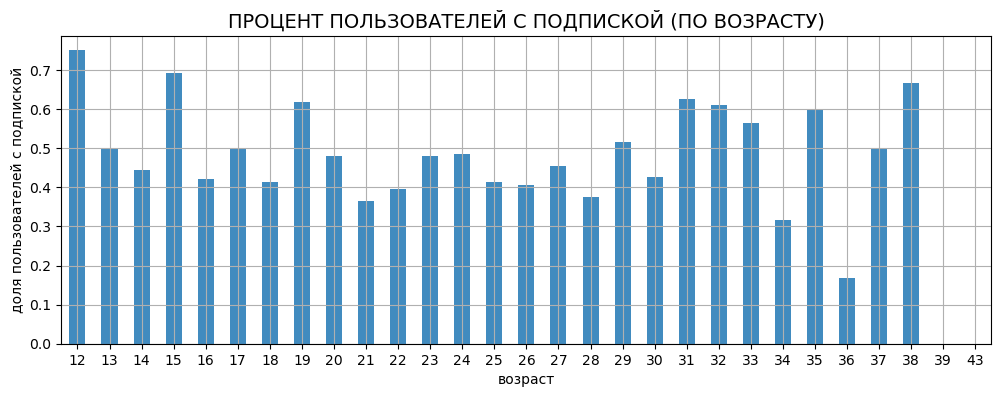

In [32]:
# используем датафрейм users_copy
# построим сводную таблицу с информацией о доле клиентов с подписками в разрезе их возраста, отсортируем таблицу по возрасту
# для визуализации используем столбчатую диаграмму

(
    users_copy
    .pivot_table(index='age', values='subscription_flg')
    .round(3)
    .sort_values(by='age')
    .plot(
        kind='bar',
        figsize=(12,4),
        grid=True,
        alpha=0.85,
        legend=False
    )
)
plt.title('ПРОЦЕНТ ПОЛЬЗОВАТЕЛЕЙ С ПОДПИСКОЙ (ПО ВОЗРАСТУ)', fontsize = 14, color = 'black')
plt.xlabel('возраст', fontsize = 10, color = 'black')
plt.ylabel('доля пользователей с подпиской', fontsize = 10, color = 'black')
plt.xticks(rotation=0)
plt.show()

Визуально можно отметить, что самая низкая доля пользователей с подпиской в возрастной группе 20-29 лет. В группах 12-19 и 30-39 эта доля выше. Но необходимо отметить, что судя по гистограмме возраста пользователей группы 12-19 и 30-39 по численности значительно уступают группе 20-29 лет. Сначала оценим распределение возраста пользователей при помощи метода describe()

In [33]:
users.age.describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Первый квартиль отсекает значение 22 года, третий квартиль - значение 28 лет. Определим точное количество пользователей в возрастных группах:
- до 20 лет;
- 20 - 29 лет;
- 30 +

In [34]:
# количество пользователей в возрастной группе до 20 лет

users.query('age < 20').user_id.count()

172

In [35]:
# количество пользователей в возрастной группе 20-29 лет

users.query('19 < age < 30').user_id.count()

1119

In [36]:
# количество пользователей в возрастной группе 30+

users.query('age > 29').user_id.count()

243

<a id=3.4></a>
### Расстояние поездки

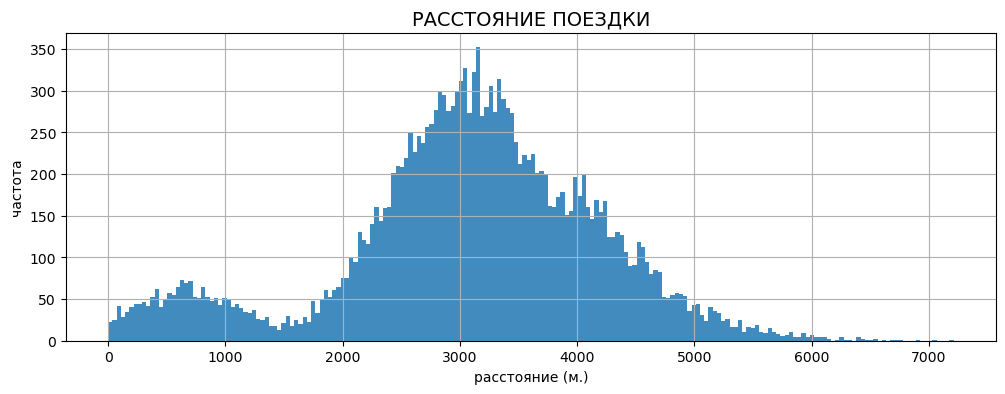

In [37]:
# на основе данных столбца distance таблицы rides построим гистограмму распределения дальностей поездок

(
    rides
    .distance
    .plot(
        kind='hist',
        bins=200,
        figsize=(12,4),
        grid=True,
        alpha=0.85,
        legend=False
    )
)
plt.title('РАССТОЯНИЕ ПОЕЗДКИ', fontsize = 14, color = 'black')
plt.xlabel('расстояние (м.)', fontsize = 10, color = 'black')
plt.ylabel('частота', fontsize = 10, color = 'black')
plt.show()

Распределение похоже на бимодальное с основным пиком значений в районе 3100 м., меньшим пиком в районе 800 м. и локальным пиком в районе значения 4000 м. Выбросов и аномалий в значениях нету. Наличие двух пиков может быть вызвано невысокими пробегами в каких-то конкретных городах или наличием в выборке двух групп пользователей: с подпиской и без подписки. Также короткие поездки могут быть поездками до ближайшей станции метро или общественного транспорта. Если это так, то подтверждение мы найдем на гистограмме распределения затраченного времени.

Еще необходимо отметить наличие очень маленьких значений и достаточно маленькое максимальное значение дальности поездки в районе 7000 м.

Посмотрим на часть гистограммы с меньшим пиком

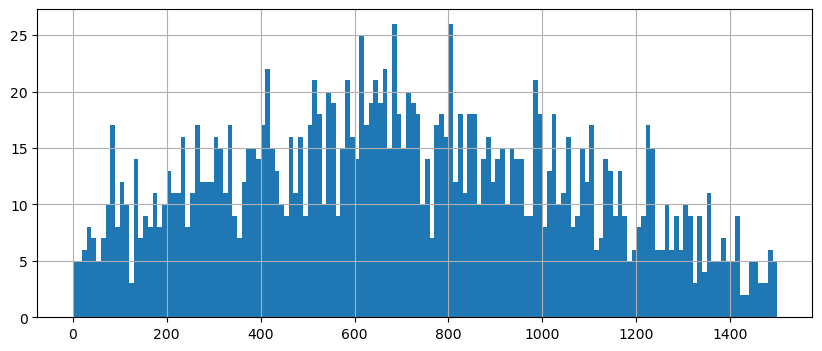

In [38]:
# построим гистограмму для диапазона 0-1500 м.

rides.distance.hist(bins=150, range=(0, 1500), figsize=(10, 4))
plt.show()

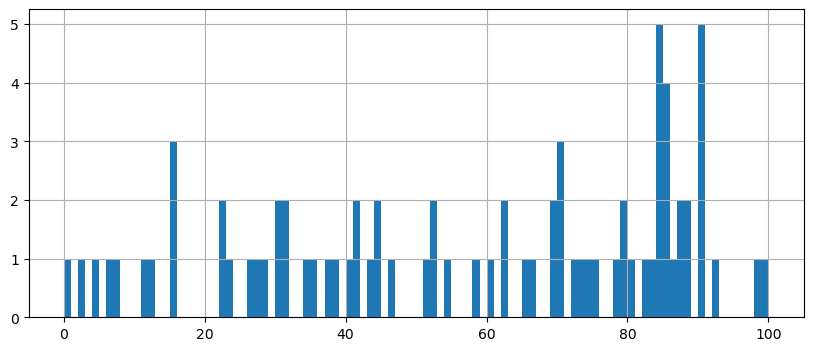

In [39]:
# построим гистограмму для диапазона 0-100 м.

rides.distance.hist(bins=100, range=(0, 100), figsize=(10, 4))
plt.show()

In [40]:
# просмотр информации о строках со значениями distance до 100 м.

rides.query('distance < 100').sort_values(by='distance').head(50)

,user_id,distance,duration,date,month
11555,1069,0.855683,10.001902,2021-01-31,1
9541,925,2.570787,3.011018,2021-10-19,10
13690,1223,4.329506,4.008958,2021-05-22,5
8658,861,6.784447,6.015656,2021-07-21,7
7841,796,7.097072,10.026614,2021-11-26,11
8906,880,11.283615,2.035632,2021-03-28,3
8324,835,12.233115,4.034952,2021-09-19,9
13940,1240,15.000606,10.045002,2021-08-20,8
15626,1364,15.366168,6.057623,2021-08-22,8
11862,1091,15.630873,13.044660,2021-03-29,3


Необходимо обратить внимание на наличие очень коротких поездок (до 100 м.). Самая короткая поздка - меньше метра с продолжительностью в 10 минут. Каких-либо закономерностей и аномалий в значениях нету. Возможно все эти короткие поездки связаны с новыми пользователями, изучающими функционал продукта, либо вызваны какими-либо неисправностями с самокатами. Данные удалять не будем.

<a id=3.5></a>
### Продолжительность поездки

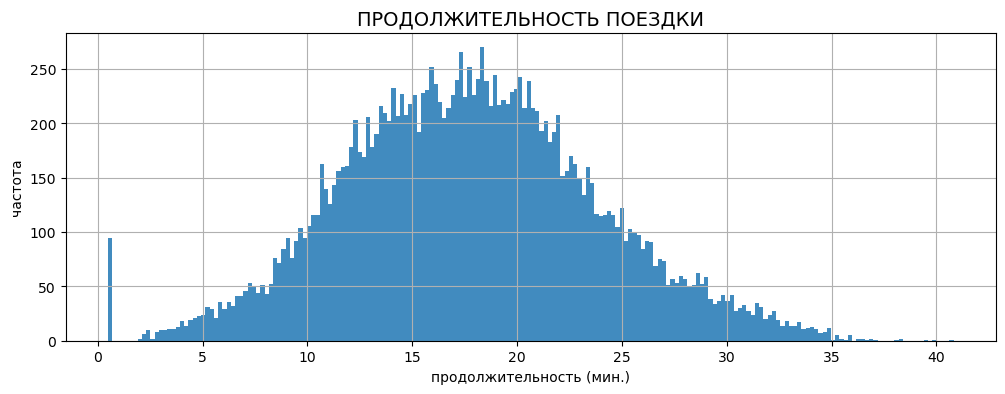

In [41]:
# на основе данных столбца duration таблицы rides построим гистограмму распределения продолжительности поездок

(
    rides
    .duration
    .plot(
        kind='hist',
        bins=200,
        figsize=(12,4),
        grid=True,
        alpha=0.85,
        legend=False
    )
)
plt.title('ПРОДОЛЖИТЕЛЬНОСТЬ ПОЕЗДКИ', fontsize = 14, color = 'black')
plt.xlabel('продолжительность (мин.)', fontsize = 10, color = 'black')
plt.ylabel('частота', fontsize = 10, color = 'black')
plt.show()

В отличие от гистограммы распределения дальностей, гистограмма распределения продолжительности поездки имеет нормальное распределение с одним пиком в районе 18 минут. Наличие меньшего максимума значений на гистограмме расстояний поездки и отсутствие такого пика значений на гистограмме продолжительности скорее всего подтверждает предположение о наличии каких-либо неисправностей с оборудованием: пользователь вынужден тратить время на решение проблем с самокатоми в итоге за тоже время преодолевает меньшее расстояние. Для окончательного подтверждения или опровержения этого предположения необходимо проверить данные по неисправностям самокатов и пробегу таких самокатов.

Необходимо взглянуть на выброс значений в районе значения 1 мин.

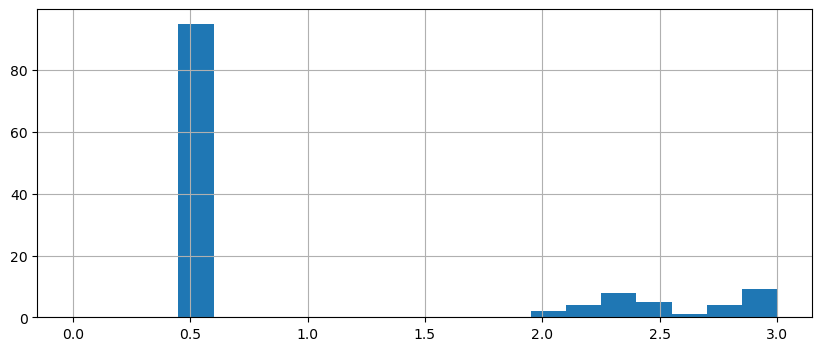

In [42]:
# гистограмма duration с диапазоном значений до 3 мин.

rides.duration.hist(bins=20, range=(0, 3), figsize=(10, 4))
plt.show()

Все короткие поездки имеют одинаковое значение длительности поездки - 0,5 мин. Посмотрим строки таблицы со значениями duration 0,5 мин.

In [43]:
rides.query('duration == 0.5').sort_values(by='user_id').head(50)

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
6860,724,6225.520342,0.5,2021-12-16,12
6883,726,4452.491518,0.5,2021-03-01,3
7018,735,4406.954812,0.5,2021-04-13,4
7160,745,5286.167732,0.5,2021-08-17,8
7364,760,4881.391865,0.5,2021-08-29,8


In [44]:
# просмотр таблицы users с ID 696-705

users.query('user_id > 695').head(10)

,index,user_id,name,age,city,subscription_type
695,695,696,Игорь,24,Москва,ultra
696,696,697,Ясмина,24,Москва,ultra
697,697,698,Егор,26,Пятигорск,ultra
698,698,699,Оксана,22,Москва,ultra
699,699,700,Айдар,22,Омск,free
700,700,701,Иван,31,Екатеринбург,free
701,701,702,Мирослава,20,Екатеринбург,free
702,702,703,Иван,30,Пятигорск,free
703,703,704,Мирон,29,Ростов-на-Дону,free
704,704,705,Елена,27,Ростов-на-Дону,free


Взглянем на дистанции этих аномально коротких поездок

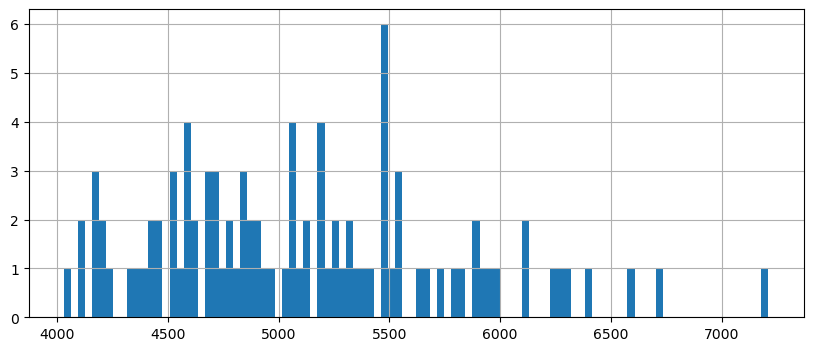

In [45]:
# гистограмма дальности поездок для строк со значениями duration 0,5 мин.

rides.query('duration == 0.5').distance.hist(bins=100, figsize=(10, 4))
plt.show()

Обращает на себя внимание одинаковая продолжительность 0,5 мин. у всех строк. Выбросы начинаются со значений ID 701 - со значения 700 начинаются пользователи без подписки. Все ыбросы в 0,5 мин. характерны только для пользователей без подписки. У всех значений с аномальной продолжительностью поездки дистанции большие: от 4000 до 7000 м. Возможно при выгрузке данных произошел сбой и значения продолжительности в районе 30 мин записались как 0,5 мин. (по аналогии с 0,5 часа). Сравним средние значения дальности поездки для аномальных значений и для значений около 30 мин.

In [46]:
# среднее значение дальности поездки для строк со значением duration 0,5 мин.

rides.query('duration == 0.5').distance.mean()

5113.176548536017

In [47]:
# среднее значение дальности поездки для строк со значением duration в диапазоне 25-35 мин.

rides.query('28 < duration < 33').distance.mean()

4064.6303170842803

Значения значительно различаются - предположение не подтвердилось. Кроме того, что все аномальные значения относятся к категории пользователей без подписки, других закономерностей у данных аномальных значений нету. Данные аномалии выглядят как реализация какой-нибудь акции с бесплатными минутами, либо как технический сбой при подсчете продолжительности поездки или при проведении обработки данных. Принимая во внимание большие расстояния, данным пользователям начислялись достаточные платежи и, в связи с чем, данные аномалии пока удалять из таблицы не будем. Позже оценим выручку от этих заказов.

<a id=3.6></a>
### Промежуточный вывод

1. По количеству клиентов первое место с 14.3% поездок занимает Пятигорск. По количеству клиентов с подпиской первое место также занимает Пятигорск.
2. Количество пользователей по городам распределено "плотно": между первым и последним местом 3.33 процентных пункта.
3. Количество пользователей с подпиской и без практически равное: 46% против 54%.
4. Самая массовая возрастная группа пользователей: 20-29 лет - 1119 записей (73%).
5. На распределении дальностей поездки есть несколько пиковых значений: наибольшее в районе 3100 м., меньшее в районе 800 м. Выбросов и аномалий в значениях нету. Необходимо отметить наличие очень маленьких значений дальности поездки (до 100 м.) и достаточно маленькое максимальное значение дальности в районе 7000 м. Наличие локального пика на значении 800 м. возможно связано с наличием неисправностей с самокатами. Достоверная проверка данного предположения на имеющейся базе данных невозможна.
6. Гистограмма распределения продолжительности поездки имеет нормальное распределение с одним пиком в районе 18 минут. Максимальная продолжительность поездки небольшая - 43 мин. Наличие меньшего максимума значений на гистограмме расстояний поездки и отсутствие такого пика значений на гистограмме продолжительности скорее всего подтверждает предположение о наличии каких-либо неисправностей с оборудованием.
7. На гистограмме распределения времени поездки присутствует группа выбросов с временем поездки 0,5 мин. У всех значений с аномальной продолжительностью поездки дистанции поездки от 4000 до 7000 м. Данные выбросы характерны только для группы пользователей без подписки. Данные строки из таблицы не удалались и требуют дополнительного анализа на стадии подсчета выручки.

[В начало](#0)

<a id=4></a>
## Объединение данных

<a id=4.1></a>
### Объединение датафреймов

Для дальнейшей работы объединим все датасеты при помощи метода merge()

In [48]:
data = users.merge(rides, on='user_id', how='inner')
data = data.merge(prices, on='subscription_type', how='inner')

In [49]:
# Контроль обработки

data.info()
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              18068 non-null  int64         
 1   user_id            18068 non-null  int64         
 2   name               18068 non-null  object        
 3   age                18068 non-null  int64         
 4   city               18068 non-null  object        
 5   subscription_type  18068 non-null  object        
 6   distance           18068 non-null  float64       
 7   duration           18068 non-null  float64       
 8   date               18068 non-null  datetime64[ns]
 9   month              18068 non-null  int32         
 10  minute_price       18068 non-null  int64         
 11  start_ride_price   18068 non-null  int64         
 12  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(6), object(

,index,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,0,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,0,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,0,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,0,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,0,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,0,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,0,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,0,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,0,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


Объединение таблицы отработало корректно. Далее выделим из основного датасета таблицы с информацией о пользователях с подпиской и без подписки.

<a id=4.2></a>
### Разделение датасета по признаку наличия подписки

Выделим из основного датасета информацию о пользователях с подпиской и без подписки.

In [50]:
data_free = data[data['subscription_type'] == 'free']
data_ultra = data[data['subscription_type'] == 'ultra']

In [51]:
# контроль обработки

data_free.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11568 entries, 6500 to 18067
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              11568 non-null  int64         
 1   user_id            11568 non-null  int64         
 2   name               11568 non-null  object        
 3   age                11568 non-null  int64         
 4   city               11568 non-null  object        
 5   subscription_type  11568 non-null  object        
 6   distance           11568 non-null  float64       
 7   duration           11568 non-null  float64       
 8   date               11568 non-null  datetime64[ns]
 9   month              11568 non-null  int32         
 10  minute_price       11568 non-null  int64         
 11  start_ride_price   11568 non-null  int64         
 12  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(6), object(3)

In [52]:
# контроль обработки

data_ultra.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6500 entries, 0 to 6499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              6500 non-null   int64         
 1   user_id            6500 non-null   int64         
 2   name               6500 non-null   object        
 3   age                6500 non-null   int64         
 4   city               6500 non-null   object        
 5   subscription_type  6500 non-null   object        
 6   distance           6500 non-null   float64       
 7   duration           6500 non-null   float64       
 8   date               6500 non-null   datetime64[ns]
 9   month              6500 non-null   int32         
 10  minute_price       6500 non-null   int64         
 11  start_ride_price   6500 non-null   int64         
 12  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(6), object(3)
memo

<a id=4.3></a>
### Информация о продолжительности и расстоянии поездок для пользователей обеих категорий

Визуализируем информацию о продолжительности и расстояниям поездок для пользователей без подписки и пользователей с подпиской

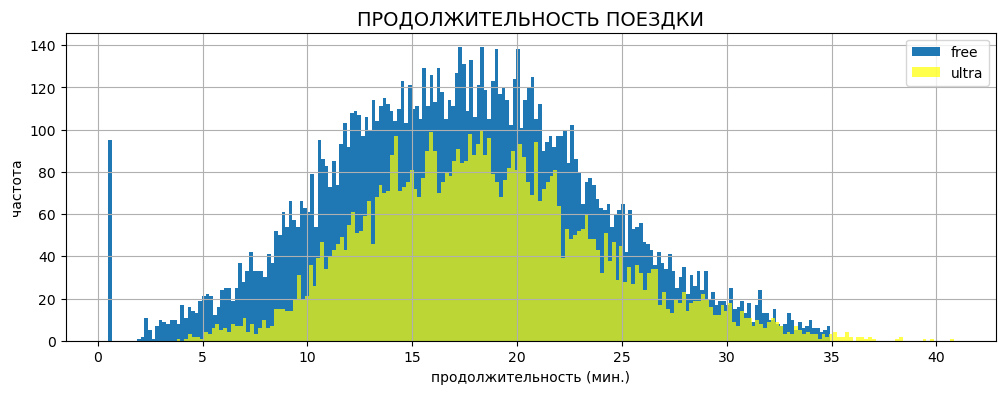

In [53]:
ax = (
    data_free
    .duration
    .plot(
        kind='hist',
        bins=200,
        figsize=(12,4),
        label = 'free',
        grid=True,
        alpha=1,
        legend=True,
        )
)
(
    data_ultra
    .duration
    .plot(
        kind='hist',
        bins=200,
        figsize=(12,4),
        label='ultra',
        grid=True,
        color='yellow',
        alpha=0.7,
        legend=True,
        ax=ax
        )
)
plt.title('ПРОДОЛЖИТЕЛЬНОСТЬ ПОЕЗДКИ', fontsize = 14, color = 'black')
plt.xlabel('продолжительность (мин.)', fontsize = 10, color = 'black')
plt.ylabel('частота', fontsize = 10, color = 'black')
plt.show()

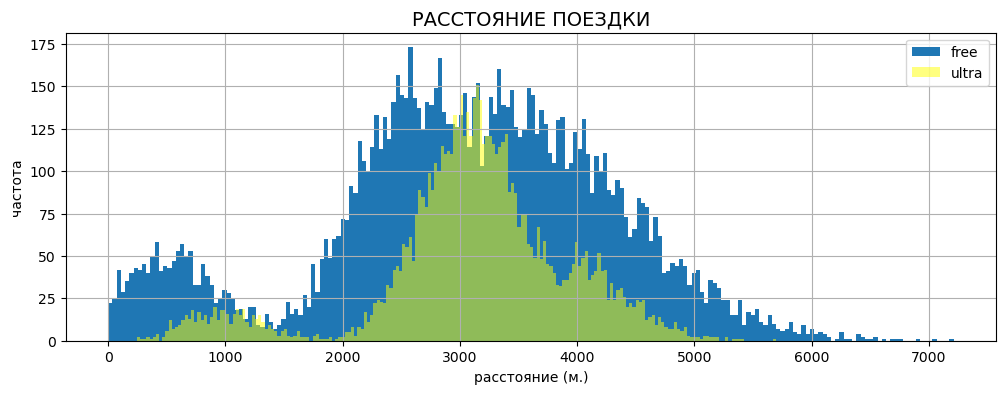

In [54]:
ax = (
     data_free
    .distance
    .plot(
        kind='hist',
        bins=200,
        figsize=(12,4),
        label = 'free',
        grid=True,
        alpha=1,
        legend=True,
        )
)
(
    data_ultra
    .distance
    .plot(
        kind='hist',
        bins=200,
        figsize=(12,4),
        label='ultra',
        grid=True,
        color='yellow',
        alpha=0.5,
        legend=True,
        ax=ax
        )
)
plt.title('РАССТОЯНИЕ ПОЕЗДКИ', fontsize = 14, color = 'black')
plt.xlabel('расстояние (м.)', fontsize = 10, color = 'black')
plt.ylabel('частота', fontsize = 10, color = 'black')
plt.show()

На гистограмме дальности поездок после разделения пользователей на две категории видно четкое разделение на 3 пика. Предположение о связи пиков с какой-то конкретной категорией пользователей не подтвердилось. Проверим предположение о наличие городов с небольшими пробегами.

In [55]:
# посчитаем среднюю дальность поездки в разрезе по городам

data.groupby('city').distance.mean()

city
Екатеринбург      3110.911801
Краснодар         3054.297171
Москва            3100.996809
Омск              3038.681678
Пятигорск         3118.677221
Ростов-на-Дону    3011.506498
Сочи              3052.961020
Тюмень            3076.242656
Name: distance, dtype: float64

<a id=4.4></a>
### Промежуточный вывод

Продолжительность поездок и пробеги меньше для пользователей с подпиской. Предположения о связи нескольких пиков на гистограмме расстояний поездки с какой-то конкретной категорией пользователей или наличием городов с меньшими пробегами не подтвердились.

[В начало](#0)

<a id=5></a>
## Подсчёт выручки

<a id=5.1></a>
### Датасет с агрегированными данными

Для проведения расчета выручки на базе таблицы data создадим таблицу ravenue. Для этого:

1. сгруппируем данные по столбцам user_id и month, также перенесем в таблицу столбец subscription_type.
2. при помощи агрегации посчитаем суммарную дальность поездок пользователя по месяцам, количество поездок и суммарное время, а также добавим в таблицу информацию о стоимости начала поездки, минуты поездки и подписки.

In [56]:
# округлим время поездок до целых значений в большую сторону при помощи метода np.ceil() библиотеки numpy

data['duration'] = np.ceil(data['duration'])

In [57]:
# создадим таблицу ravenue со столбцами, необходимыми для расчета выручки

ravenue = (
    data
    .groupby(['user_id', 'month', 'subscription_type'])
    .agg({'distance':['sum', 'count'], 'duration':'sum', 'minute_price':'first', 'start_ride_price':'first', 'subscription_fee':'first'})
    .reset_index()    
)

# переименуем столбцы

ravenue.columns = ['user_id', 'month', 'subscription_type', 'total_distance', 'total_rides', 'total_duration', \
                    'minute_price', 'start_ride_price', 'subscription_fee']

In [58]:
# контроль обработки

ravenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11331 entries, 0 to 11330
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            11331 non-null  int64  
 1   month              11331 non-null  int32  
 2   subscription_type  11331 non-null  object 
 3   total_distance     11331 non-null  float64
 4   total_rides        11331 non-null  int64  
 5   total_duration     11331 non-null  float64
 6   minute_price       11331 non-null  int64  
 7   start_ride_price   11331 non-null  int64  
 8   subscription_fee   11331 non-null  int64  
dtypes: float64(2), int32(1), int64(5), object(1)
memory usage: 752.6+ KB


<a id=5.2></a>
### Расчет выручки

На основании таблицы  ravenue gосчитаем ежемесячеую выручку на каждого пользователя

In [59]:
ravenue['income'] = ravenue['total_rides'] * ravenue['start_ride_price'] \
+ ravenue['total_duration'] * ravenue['minute_price'] + ravenue['subscription_fee']

In [60]:
# контроль обработки. Проверим построение таблицы ravenue и наличие пустых строк в таблице

ravenue.info()
display(ravenue.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11331 entries, 0 to 11330
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            11331 non-null  int64  
 1   month              11331 non-null  int32  
 2   subscription_type  11331 non-null  object 
 3   total_distance     11331 non-null  float64
 4   total_rides        11331 non-null  int64  
 5   total_duration     11331 non-null  float64
 6   minute_price       11331 non-null  int64  
 7   start_ride_price   11331 non-null  int64  
 8   subscription_fee   11331 non-null  int64  
 9   income             11331 non-null  float64
dtypes: float64(3), int32(1), int64(5), object(1)
memory usage: 841.1+ KB


,user_id,month,subscription_type,total_distance,total_rides,total_duration,minute_price,start_ride_price,subscription_fee,income
0,1,1,ultra,7027.511294,2,42.0,6,0,199,451.0
1,1,4,ultra,754.159807,1,7.0,6,0,199,241.0
2,1,8,ultra,6723.470560,2,46.0,6,0,199,475.0
3,1,10,ultra,5809.911100,2,32.0,6,0,199,391.0
4,1,11,ultra,7003.499363,3,56.0,6,0,199,535.0
5,1,12,ultra,6751.629942,2,28.0,6,0,199,367.0
6,2,3,ultra,10187.723006,3,63.0,6,0,199,577.0
7,2,4,ultra,6164.381824,2,40.0,6,0,199,439.0
8,2,6,ultra,3255.338202,1,14.0,6,0,199,283.0
9,2,7,ultra,6780.722964,2,48.0,6,0,199,487.0


Для анализа выручки по месяцам в разрезе вида подписки на основании датафрейма ravenue построим сводную таблицу и график распределения выручки по месяцам

In [61]:
# сводная таблица

ravenue_subs_month = (
    ravenue
    .pivot_table(
        index='month',
        columns='subscription_type',
        values='income',
        aggfunc='sum',
        #margins=True
    )
    .reset_index()
)

# переименуем столбцы
ravenue_subs_month.columns = ['month', 'free', 'ultra']

# добавим столбцы для расчета выручки по месяцам и доли пользователей без подписки и пользователей с подпиской от общей выручки
# выручка по месяцам
ravenue_subs_month['total'] = ravenue_subs_month['free'] + ravenue_subs_month['ultra']

# доля выручки пользователей без подписки
ravenue_subs_month['free_part'] = ((ravenue_subs_month['free'] / ravenue_subs_month['total']).round(2) * 100)

# доля выручки пользователей с подпиской
ravenue_subs_month['ultra_part'] = ((ravenue_subs_month['ultra'] / ravenue_subs_month['total']).round(2) * 100)

ravenue_subs_month

,month,free,ultra,total,free_part,ultra_part
0,1,193850.0,144108.0,337958.0,57.0,43.0
1,2,165856.0,124572.0,290428.0,57.0,43.0
2,3,187214.0,142608.0,329822.0,57.0,43.0
3,4,185598.0,137318.0,322916.0,57.0,43.0
4,5,188030.0,149235.0,337265.0,56.0,44.0
5,6,192144.0,143834.0,335978.0,57.0,43.0
6,7,185038.0,143466.0,328504.0,56.0,44.0
7,8,187116.0,138534.0,325650.0,57.0,43.0
8,9,193700.0,129337.0,323037.0,60.0,40.0
9,10,181428.0,133932.0,315360.0,58.0,42.0


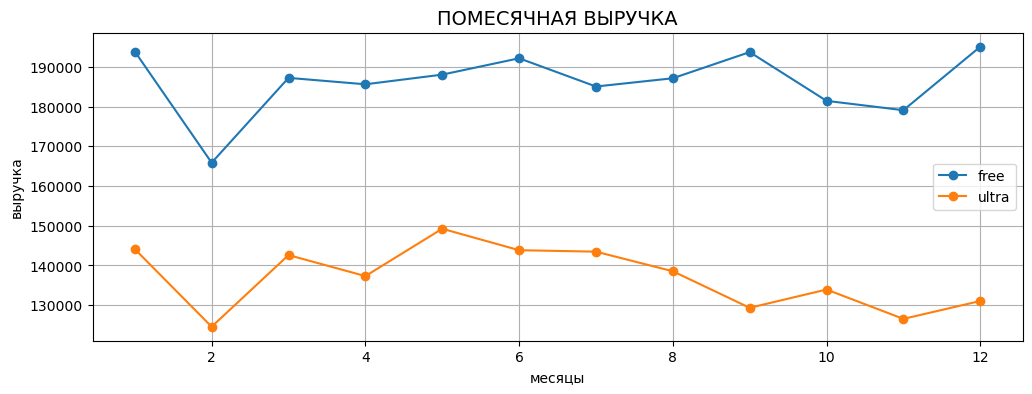

In [62]:
# график распределения выручки по месяцам

(
    ravenue_subs_month
    .plot(
        x='month',
        y=['free', 'ultra'],
        style='o-',
        label=['free', 'ultra'],
        grid=True,
        figsize=(12, 4)
    )
)
plt.title('ПОМЕСЯЧНАЯ ВЫРУЧКА', fontsize = 14, color = 'black')
plt.xlabel('месяцы', fontsize = 10, color = 'black')
plt.ylabel('выручка', fontsize = 10, color = 'black')
plt.show()

Пользователи без подписки приносят компании значительно больше выручки. Но при подсчете выручки также необходимо учесть то, что пользователей без подписки значительно больше, чем пользователей с подпиской. Возможно это сильно влияет на общую выручку по группам. Что бы проверить это предположение сравним выручку с одного пользователя с подпиской и без.

In [63]:
# средняя выручка пользователя без подписки

ravenue_subs_month.free.sum() / ravenue.query('subscription_type == "free"').user_id.count()

328.6413651073845

In [64]:
# средняя выручка пользователя с подпиской

ravenue_subs_month.ultra.sum() / ravenue.query('subscription_type == "ultra"').user_id.count()

362.7921906022502

<a id=5.3></a>
### Промежуточный вывод

Выручка по месяцам распределена относительно равномерно, есть небольшой спад во втором месяце.

Пользователи без подписки приносят компании 58% выручки, пользователи с подпиской 42%. В абсолютных цифрах:

- пользователи без подписки 2234104.0 руб
- пользователи с подпиской 1644537.0 руб.

Но есть важное замечание: для пользователей с подпиской мы засчитываем списания по подписке только за те месяцы, где у него были поездки. Обычно абонентская плата в сервисах списывается независимо от того использовалась услуга или нет. Если бы мы учитывали списания по подписке и за те месяцы, где не было поездок, выручка от пользователей с подпиской значительно увеличилась бы. В тоже время пользователь может отменять подписку в те месяцы, когда он не пользуется сервисом. В связи с тем, что нам не доступна информация о наличии подписки по месяцам, мы не можем провести более детальный анализ.

Средняя выручка с одного пользователя с подпиской на 9% выше. Следовательно имеет смысл проводить рекламные компании для увеличения количества пользователей с подпиской.

[В начало](#0)

<a id=6></a>
## Проверка гипотез

Проверим гипотезы:

- пользователи с подпиской тратят больше времени на поездки;
- среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров;
- помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

<a id=6.1></a>
### Пользователи с подпиской тратят больше времени на поездки

Гиппотеза из задания - пользователи с подпиской тратят больше времени на поездки.

Нулевая гипотеза - среднее время поездки пользователей с подпиской равно среднему времени поездки пользователей без подписки.
Альтернативная гипотеза - среднее время поездки пользователей с подпиской больше чем среднее время поездки пользователей без подписки.

In [65]:
# зададим уровень статистической значимости 5%
alpha = 0.05

# выборка времени поездки для пользователей с подпиской (до выполнения акругления)
aggregate_1 = data_ultra.duration

# выборка времени поездки для пользователей без подпиской (до выполнения акругления)
aggregate_2 = data_free.duration 

# для проведения теста выбираем метод ttest_ind
# параметру alternative присваиваем значение greater
# параметр equal_var оставляем по умолчанию т.к. выборки достаточно большие
results = st.ttest_ind(aggregate_1, aggregate_2, alternative='greater')

print(f'Средняя продолжительность поездки для пользователей с подпиской: {aggregate_1.mean().round(2)} мин.')
print(f'Средняя продолжительность поездки для пользователей без подпиской: {aggregate_2.mean().round(2)} мин.')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу') 

Средняя продолжительность поездки для пользователей с подпиской: 18.54 мин.
Средняя продолжительность поездки для пользователей без подпиской: 17.39 мин.
p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Результат проверки гипотезы: есть основания отвергнуть нулевую гипотезу в пользу альтернативной гипотезы. По среднему значению видно, что среднее время поездки пользователей с подпиской выше чем пользователей без подписки.

<a id=6.2></a>
### Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров

Гиппотеза из задания - среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 м.

Нулевая гипотеза - среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равно 3130 м.
Альтернативная гипотеза - среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, больше 3130 м.

In [66]:
# зададим целевое среднее расстояние 3130 метров
avg_distance = 3130

# зададим уровень статистической значимости 5%
alpha = 0.05

# выборка дальности поездки для пользователей с подпиской
distance = data_ultra.distance 

# для проведения теста выбираем метод ttest_1samp
# параметру alternative присваиваем значение less
results_2 = st.ttest_1samp(distance, avg_distance, alternative='greater')

print(f'Средняя дальность поездки для пользователей с подпиской: {distance.mean().round(2)} м.')
print('p-значение:', results_2.pvalue)

if (results_2.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу') 

Средняя дальность поездки для пользователей с подпиской: 3115.45 м.
p-значение: 0.9195368847849785
Нет оснований отвергнуть нулевую гипотезу


Результат проверки гипотезы: нет оснований отвергнуть нулевую гипотезу. Средняя дальность поездки для пользователей с подпиской 3115 м. - Разница очень маленькая.

<a id=6.3></a>
### Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

Гиппотеза из задания - помесячная выручка от пользователей с подпиской по месяцам выше чем выручка от пользователей без подписки.

Нулевая гипотеза - средняя помесячная выручка от пользователей с подпиской равна средней помесячной выручке от пользователей без подписки.
Альтернативная гипотеза - среднея помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

In [67]:
# зададим уровень статистической значимости 5%
alpha = 0.05

# выборка помесячной выручки с пользователей с подпиской (до суммирования)
aggregate_3 = ravenue[ravenue['subscription_type'] == 'ultra'].income

# выборка помесячной выручки с пользователей без подпиской (до суммирования)
aggregate_4 = ravenue[ravenue['subscription_type'] == 'free'].income

# для проведения теста выбираем метод ttest_ind
# параметру alternative присваиваем значение greater
# параметр equal_var оставляем по умолчанию т.к. выборки достаточно большие
results_3 = st.ttest_ind(aggregate_3, aggregate_4, alternative='greater')

print(f'Средняя помесячная выручка с пользователя с подпиской: {aggregate_3.mean().round(2)} руб.')
print(f'Средняя помесячная выручка с пользователя без подпиской: {aggregate_4.mean().round(2)} руб.')

print('p-значение:', results_3.pvalue)

if results_3.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу') 

Средняя помесячная выручка с пользователя с подпиской: 362.79 руб.
Средняя помесячная выручка с пользователя без подпиской: 328.64 руб.
p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Результат проверки гипотезы: есть основания отвергнуть нулевую гипотезу в пользу альтернативной гипотезы. Средняя помесячная выручка с одного пользователя с подпиской выше чем выручка от пользователя без подписки. 

<a id=6.4></a>
### Проверка гипотезы о количестве обращений в службу поддержки

Ситуация: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. 
Задание: некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него.

В этом случае необходимо провести тест для двух зависимых (парных) выборок - выборок из одной генеральной совокупности, с которой произошли какие-либо изменения. 
Нулевая гипотеза - количество обращений в службу поддержки до и после изменения равны. 
Альтернативная гипотеза - количество обращений в службу поддержки после обновления меньше. 

Для проведения теста используется метод ttest_rel. Методу передается два массива данных: количество обращений в поддержку до обновления и количество обращений в поддержку после изменений. Массивы должны быть равны по размеру и порядку элементов. Т.к. гипотеза односторонняя (проверяем гипотезу о том, что истинное среднее значение генеральной совокупности до изменений выше) параметру alternative передаем значение greater.

<a id=6.5></a>
### Промежуточный вывод

Проверив гипотезы из задания были получены следующие результаты.

Гипотеза 1 подтверждена. Есть основания полагать что среднее время поездки пользователей с подпиской выше чем пользователей без подписки.

Гипотеза 2 не подтверждена. Нет оснований полагать что cредняя дальность поездки для пользователей с подпиской не превышает 3130 м.

Гипотеза 3 подтверждена. Есть основания полагать что помесячная выручка от одного пользователя с подпиской выше, чем выручка от пользователя без подписки.

[В начало](#0)

<a id=7></a>
## Распределения

<a id=7.1></a>
### Задача 1

Выясните, какое минимальное количество промокодов нужно разослать, чтобы с вероятностью 5% по итогу проведения акции минимум 100 человек продлили подписку в сервисе. При условии того, что после бесплатного пробного периода подписку продлевают 10 % пользователей.

Условия задачи:
- Количество пользователей, продлевающих подписку после пробного периода - 10%;
- Целевое количество пользователей, продливших подписку - 100 и более;
- Целевая вероятность получения менее 100 пользователей, продливших подписку - 5%.

Необходимо определить количество промокодов, которое необходимо разослать пользователям, что бы 100 и более пользователей продлили платную подписку.

Для ответа на поставленный вопрос можно использовать два разных метода:

1. При помощи цикла можно определить n для биноминального распределения при котором методом binom.cdf будет определена вероятность получить 99 и менее пользователей (целевое значение, отсекающее левую часть распределения) меньше 5%. Диапазон перебора устанавливаем исходя из того, что вероятность благоприятного исхода p=0.1, и при такой вероятности 100 будет математическим ожиданием при n примерно равным 1000.

2. Апроксимацией биноминального распределения нормальным. Для поиска вероятности выполнения задания используем метод cdf.или метод ppf. В случае использования метода ppf целевым параметром будет вероятность невыполнения задания (5%). Путем ручного подбора количества разосланных промокодов (параметр n биноминального распределения) мы получим в ответе количество оставшихся подписчиков.

In [68]:
# задаем целевой показатель - количество подписок, отсекающее левый хвост распределения
target = 99

# вероятность продления подписки
p = 0.1

# при помощи цикла найдем необходимое количество разосланных промокодов
# при котором вероятность получения 100 и более повторных подписок будет больше 95%
for n in range (900, 1400):
    if binom.cdf(target, n, p) < 0.05:
        print("Число промокодов:", n)
        print(f'Вероятность (%) получить {target} клиентов и менее:', round((binom.cdf(target, n, p)) * 100, 3))
        print(f'Вероятность (%) получить {target + 1} клиентов и более:', round((1-(binom.cdf(target, n, p))) * 100, 3))
        break

Число промокодов: 1161
Вероятность (%) получить 99 клиентов и менее: 4.976
Вероятность (%) получить 100 клиентов и более: 95.024


Для проверки решения методом апроксимации биноминального распределения нормальным найдем вероятность отсечения правого хвоста в 100 пользователей с вероятностью в 95%. Число n уже примерно известно. Установим его точное значение простым подбором.

Апроксимация корректная
Вероятность (%) получить 100 клиентов и более: 95.01


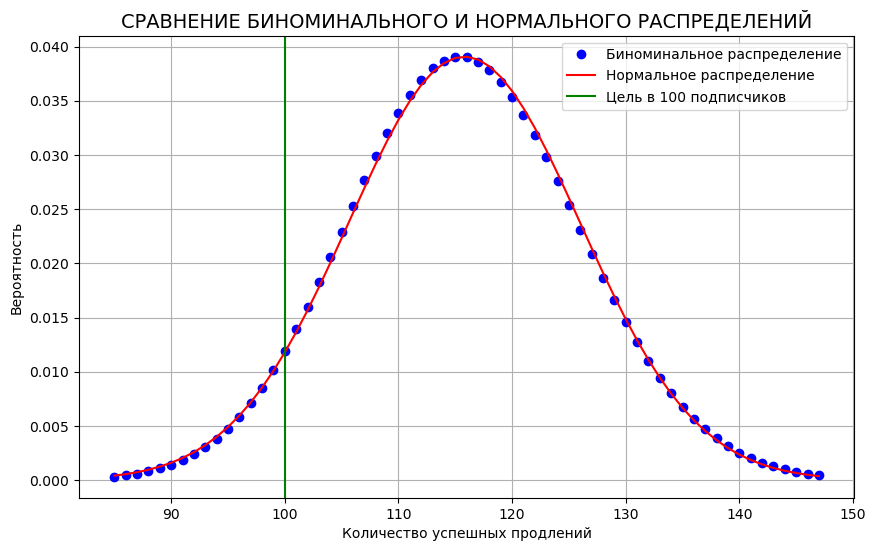

In [69]:
# задаем параметры биномиального распределения
n = 1158
p = 0.1

# задаем мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

# проверяем выполняется ли условие аппроксимации:
# лежит ли mu ± 3 sigma в промежутке от 0 до n
if (mu - (3 * sigma) >= 0) and ((mu + (3 * sigma) <= n)):
    print('Апроксимация корректная')
else:
    print('Условие апроксимации не выполняется')

# для апроксимации задаем нормальное рапсределение
distr = st.norm(mu, sigma) 

# при помощи метода cdf рассчитаем вероятность получения целевого количества подписчиков и менее
result = 1 - distr.cdf(target)
print(f'Вероятность (%) получить {target + 1} клиентов и более:', round((result * 100), 2))


# для визуализации апроксимации 
# построим графики нормального и биноминального распределения
# в диапазоне плотности вероятности от 0,001 до 0,999
x = np.arange(binom.ppf(0.001, n, p), binom.ppf(0.999, n, p))

# генерируем данные для биноминального распределения
binom_dstr = binom.pmf(x, n, p)

# генерируем данные для апроксимации нормальным распределение
norm_dstr = norm.pdf(x, mu, sigma)

plt.figure(figsize=(10,6))
plt.plot(x, binom_dstr, 'bo', label='Биноминальное распределение')
plt.plot(x, norm_dstr, 'r-', label='Нормальное распределение')
plt.axvline(x=100, color='green', label='Цель в 100 подписчиков')
plt.title('СРАВНЕНИЕ БИНОМИНАЛЬНОГО И НОРМАЛЬНОГО РАСПРЕДЕЛЕНИЙ', fontsize = 14, color = 'black')
plt.xlabel('Количество успешных продлений', fontsize = 10, color = 'black')
plt.ylabel('Вероятность', fontsize = 10, color = 'black')
plt.legend()
plt.grid(True)
plt.show()

Ответ: количество разосланных промокодов n, определенное при помощи цикла и метода binom.cdf равна 1161. Величина n, определенная вручную при помощи апроксимации биноминального распределения нормальным равна 1158.

<a id=7.2></a>
### Задача 2

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. С вероятностью 40% клиенты открывают эти сообщения. Отдел рассылает 1 млн. уведомлений. Необходимо оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Условия задачи:
- разослано 1 млн уведомлений;
- вероятность открытия уведомления - 40%

Необходимо найти вероятность того, что уведомление прочитают 399500 и менее пользователей.

Для ответа на поставленный вопрос будем использовать апроксимацию биноминального распределения нормальным и метод cdf нормального распределения.

Апроксимация корректная
Вероятность (%) того, что уведомление откроют 399500 пользователей и менее равна: 15.37


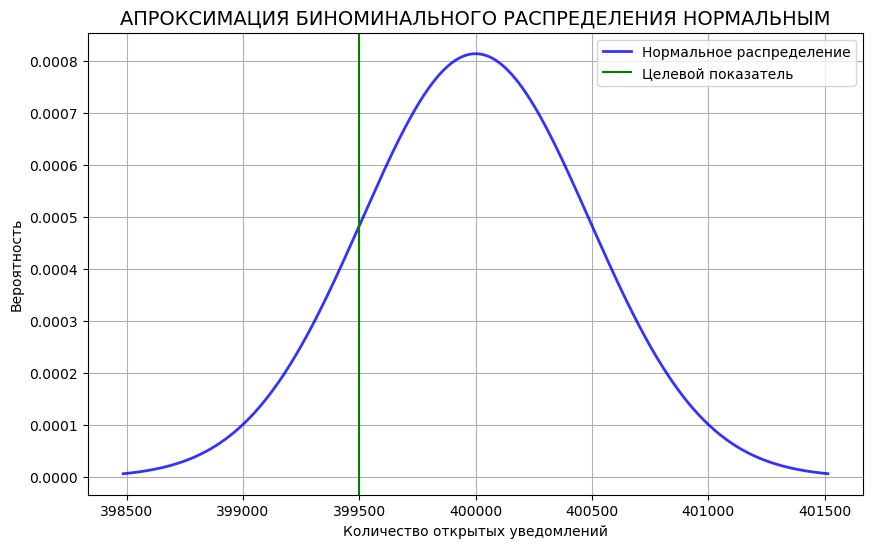

In [70]:
# задаем параметры биномиального распределения
n = 1e6
p = 0.4

# задаем целевой показатель
target = 399500

# задаем мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

# проверяем выполняется ли условие аппроксимации:
# лежит ли mu ± 3 sigma в промежутке от 0 до n
if (mu - (3 * sigma) >= 0) and ((mu + (3 * sigma) <= n)):
    print('Апроксимация корректная')
else:
    print('Условие апроксимации не выполняется')
    
# для апроксимации задаем нормальное рапсределение
distr = st.norm(mu, sigma) 

# при помощи метода cdf рассчитаем вероятность получения целевого количества подписчиков и менее
result = distr.cdf(target)

print(f'Вероятность (%) того, что уведомление откроют {target} пользователей и менее равна:', round((result * 100), 2))


# для визуализации апроксимации 
# построим график нормального распределения в диапазоне плотности вероятности от 0,001 до 0,999
x = np.arange(binom.ppf(0.001, n, p), binom.ppf(0.999, n, p))
norm_dstr = norm.pdf(x, mu, sigma)

plt.figure(figsize=(10,6))
plt.plot(x, norm_dstr, 'b-', lw=2, alpha=0.8, label='Нормальное распределение')
plt.axvline(x=399500, color='green', label='Целевой показатель')
plt.title('АПРОКСИМАЦИЯ БИНОМИНАЛЬНОГО РАСПРЕДЕЛЕНИЯ НОРМАЛЬНЫМ', fontsize = 14, color = 'black')
plt.xlabel('Количество открытых уведомлений', fontsize = 10, color = 'black')
plt.ylabel('Вероятность', fontsize = 10, color = 'black')
plt.legend()
plt.grid(True)
plt.show()

Ответ: вероятность того, что push-уведомление откроют менее 399,5К пользователей 15,37%

<a id=8></a>
## Вывод

**Проблемы в данных:**

- В таблице users удалено 31 дублированное значение.

- Неявные дубликаты в названиях населенных пунктов и дубликаты по совокупности основных параметров не обнаружены.

- В столбце date таблицы rides был неверный тип данных. Тип данных был изменен с object на datetime64.

- В таблицу rides добавлен столбец с информацией о месяце поездки на основании столбца date.


**Выводы из исследования:**

1. Проведение исследовательского анализа данных:

- По количеству поездок первое место занимает Пятигорск - 14,3%. По количеству клиентов с подпиской первое место также занимает Пятигорск.

- Количество пользователей по городам распределено достаточно равномерно: разница между первым и последним местом 3.33 процентных пункта.

- Количество пользователей с подпиской и без: 46% против 54%.

- Самая массовая возрастная группа пользователей: 20-29 лет (1119 записей или 73%).

- На гистограмме дальностей поездки есть несколько пиковых значений: наибольшее в районе 3100 м., меньшее в районе 800 м. Выбросов и аномалий в значениях нету. Присутствуют очень маленькие значений дальности поездки (до 100 м.). Максимальное значение дальности достаточно небольшое - примерно 7000 м. Средние пробеги по городам практически одинаковые. Наличие локального пика на значении 800 м. возможно связано с наличием неисправностей с самокатами. Достоверная проверка данного предположения на имеющейся базе данных невозможна.

- Гистограмма распределения продолжительности поездки имеет нормальное распределение с одним пиком в районе 18 минут. Максимальная продолжительность поездки небольшая - 43 мин. Наличие меньшего максимума значений на гистограмме расстояний поездки и отсутствие такого пика значений на гистограмме продолжительности скорее всего подтверждает предположение о наличии периодических неисправностей с оборудованием.

- На гистограмме распределения времени поездки присутствует группа выбросов с временем поездки 0,5 мин. У всех значений с аномальной продолжительностью поездки дистанции поездки от 4000 до 7000 м. Данные выбросы характерны только для группы пользователей без подписки. Возможно эти выбросы связаны с техническими сбоями или проведением каких-либо рекламных акций. Данные строки из таблицы не удалались и требуют дополнительного анализа на стадии подсчета выручки.

- Выручка по месяцам распределена относительно равномерно, есть небольшой спад во втором месяце.

- Пользователи без подписки приносят компании 58% выручки, пользователи с подпиской - 42% В абсолютных цифрах по выборке:
пользователи без подписки 2234104.0 руб
пользователи с подпиской 1644537.0 руб.

- Средняя выручка с одного пользователя с подпиской на 9% выше.

Замечание: при проведении исследования для пользователей с подпиской обонентская плата засчитывалась только за те месяцы, где у пользователя бяли поездки, что могло привести к искажению информации о выручке с этих пользователей. В связи с тем, что нам не доступна информация о списаниях по подписке по месяцам, мы не можем провести более детальный анализ.

2. Исследование гипотез.

Командой сервиса была поставлена задача проверить 3 гипотезы:

- Пользователи с подпиской тратят больше времени на поездки;
- Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров;
- Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Гипотеза 1 подтвердилась. Средняя продолжительность поездки пользователей с подпиской выше, чем пользователей без подписки. 

Гипотеза 2 не подтвердилась. По данным имеющейся выборки нельзя утверждать, что средняя дальность поездки для пользователей с подпиской не превышает 3130 м.

Гипотеза 3 подтвердилась. Средняя помесячная выручка от одного пользователя с подпиской выше, чем выручка от пользователя без подписки.

3. Задачи отдела маркетинга.

Командой сервиса были поставлены 2 задачи:

- На основании данных о ранее проведенной акции с раздачей промокодов найти минимальное количество промокодов, которые надо разослать клиентам, чтобы с вероятностью 95% минимум 100 клиентов продлили подписку после окончания бесплатного периода;
- Оценить вероятность того, что при рассылке 1 млн. уведомлений в приложении эти уведомления откроют менее 399,5 тыс. пользователей.

Задача 1: примерное количество необходимых промокодов - 1160 шт. 

Задача 2: вероятность того, что push-уведомление откроют менее 399,5К пользователей 15,37%.


**Рекомендации:**

1. В связи с тем, что средняя помесячная выручка с пользователя с подпиской выше, чем с пользователя без подписки имеет смысл проводить рекламные компании для увеличения количества пользователей с подпиской.

2. Отдельно добавить в базу данных информацию о наличии ежемесячных списаний по подписке.

3. Проверить источник появления аномальных значений продолжительности поездки.

4. Проверить предположение о наличии технических неисправностей с самокатами. Возможно необходимо проанализировать базу обращений в службу тех. поддержки.

[В начало](#0)